# EDA Airbnb en Nueva York

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("../data/raw/internal-link.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe(include="all")


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [6]:
df.duplicated().sum()
df.isna().sum()
df.shape

(48895, 16)

In [7]:
df.columns
col_info = {
    "id": "Identificador único del anuncio.",
    "name": "Título del anuncio.",
    "host_id": "Identificador del anfitrión.",
    "host_name": "Nombre del anfitrión.",
    "neighbourhood_group": "Distrito principal de NYC (Manhattan, Brooklyn…).",
    "neighbourhood": "Vecindario específico.",
    "latitude": "Latitud.",
    "longitude": "Longitud.",
    "room_type": "Tipo de habitación (entera, privada, compartida).",
    "price": "Precio por noche.",
    "minimum_nights": "Noches mínimas requeridas.",
    "number_of_reviews": "Cantidad de reseñas recibidas.",
    "last_review": "Fecha de última reseña.",
    "reviews_per_month": "Promedio de reseñas por mes.",
    "calculated_host_listings_count": "Número de listings del host.",
    "availability_365": "Disponibilidad del alojamiento en un año.",
}
col_info

{'id': 'Identificador único del anuncio.',
 'name': 'Título del anuncio.',
 'host_id': 'Identificador del anfitrión.',
 'host_name': 'Nombre del anfitrión.',
 'neighbourhood_group': 'Distrito principal de NYC (Manhattan, Brooklyn…).',
 'neighbourhood': 'Vecindario específico.',
 'latitude': 'Latitud.',
 'longitude': 'Longitud.',
 'room_type': 'Tipo de habitación (entera, privada, compartida).',
 'price': 'Precio por noche.',
 'minimum_nights': 'Noches mínimas requeridas.',
 'number_of_reviews': 'Cantidad de reseñas recibidas.',
 'last_review': 'Fecha de última reseña.',
 'reviews_per_month': 'Promedio de reseñas por mes.',
 'calculated_host_listings_count': 'Número de listings del host.',
 'availability_365': 'Disponibilidad del alojamiento en un año.'}

In [8]:
df.isna().sum()
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df["last_review"] = pd.to_datetime(df["last_review"])
df = df.drop(columns=["id", "name", "host_name"])


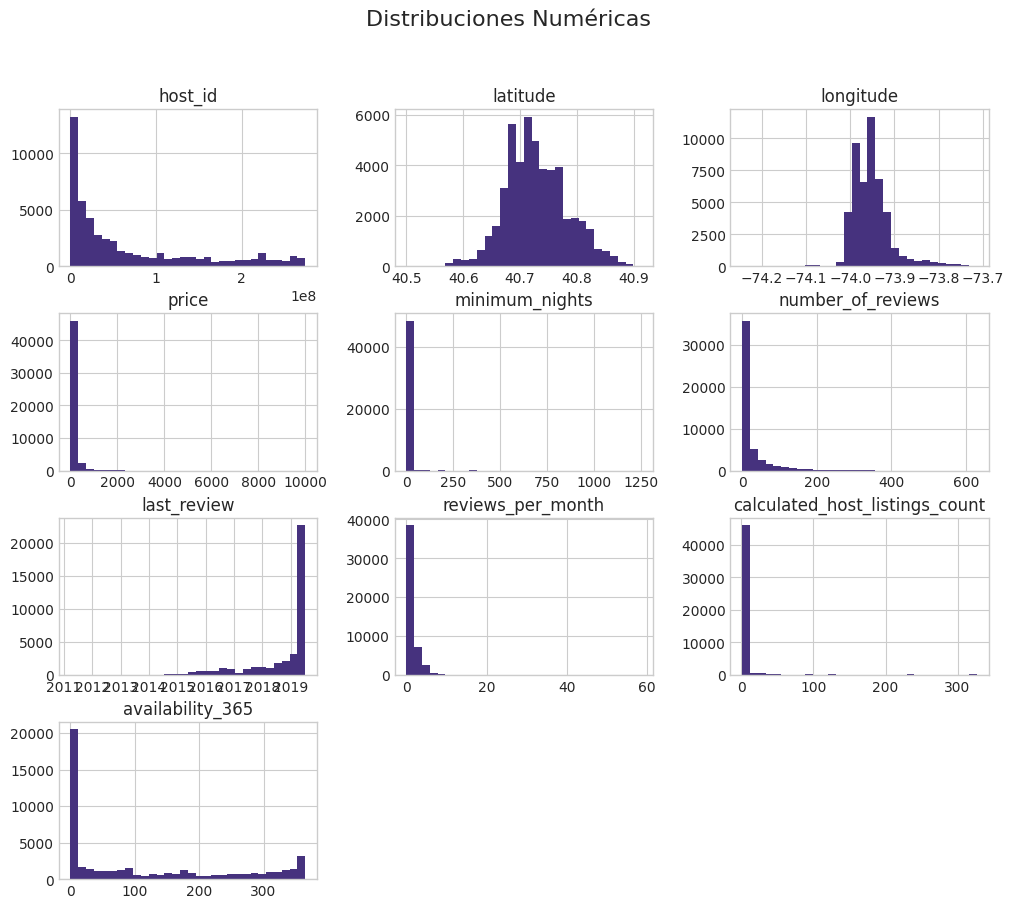

In [9]:
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribuciones Numéricas", fontsize=16)
plt.show()


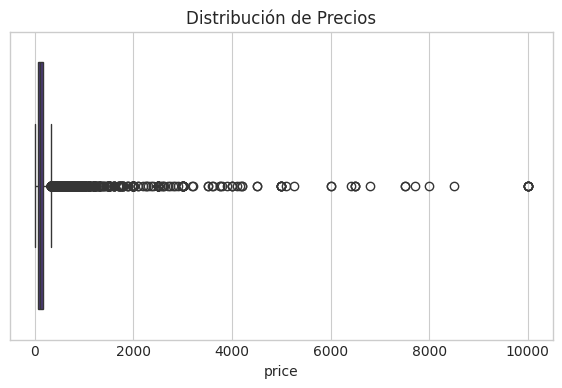

In [10]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["price"])
plt.title("Distribución de Precios")
plt.show()


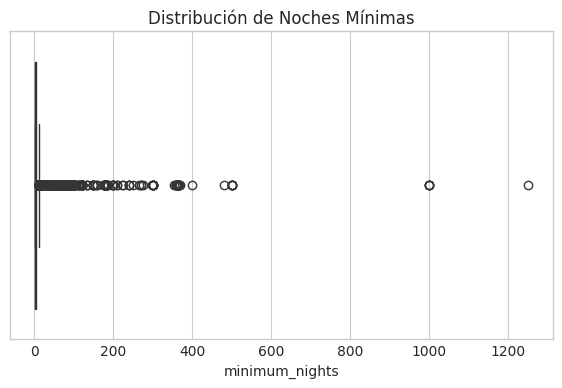

In [11]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["minimum_nights"])
plt.title("Distribución de Noches Mínimas")
plt.show()


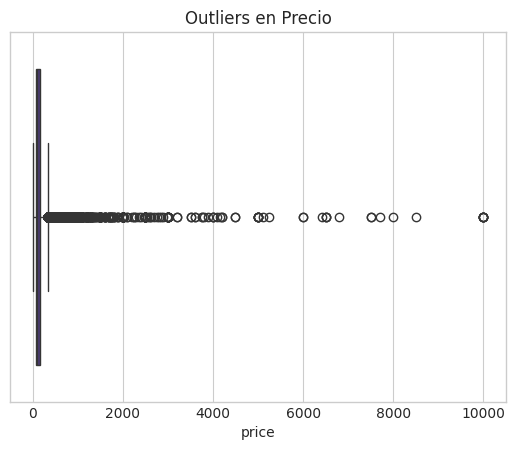

In [12]:
sns.boxplot(x=df["price"])
plt.title("Outliers en Precio")
plt.show()


In [13]:
df = df[df["price"] <= 1000]


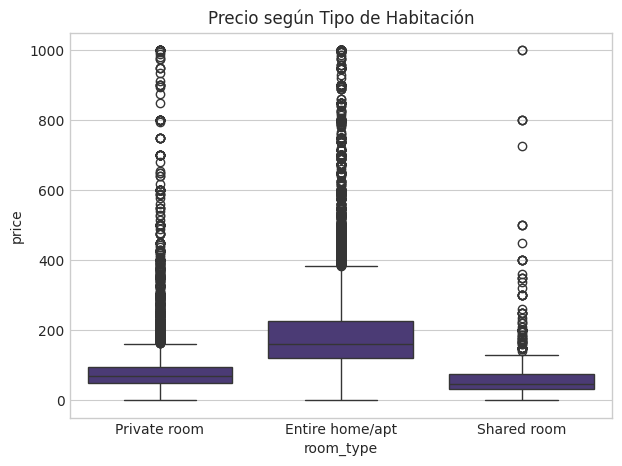

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="room_type", y="price")
plt.title("Precio según Tipo de Habitación")
plt.show()


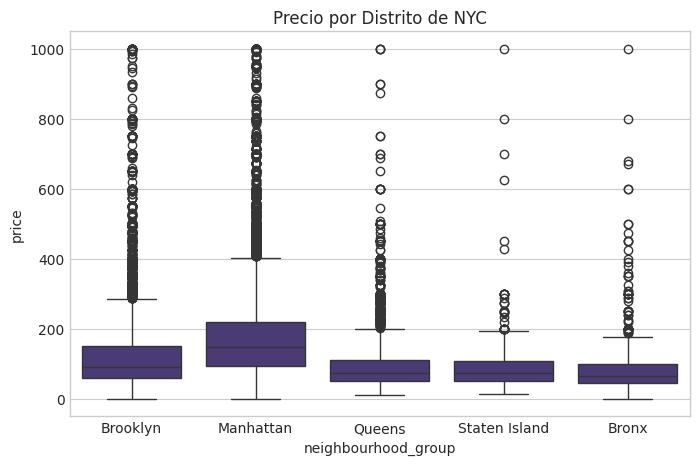

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="neighbourhood_group", y="price")
plt.title("Precio por Distrito de NYC")
plt.show()


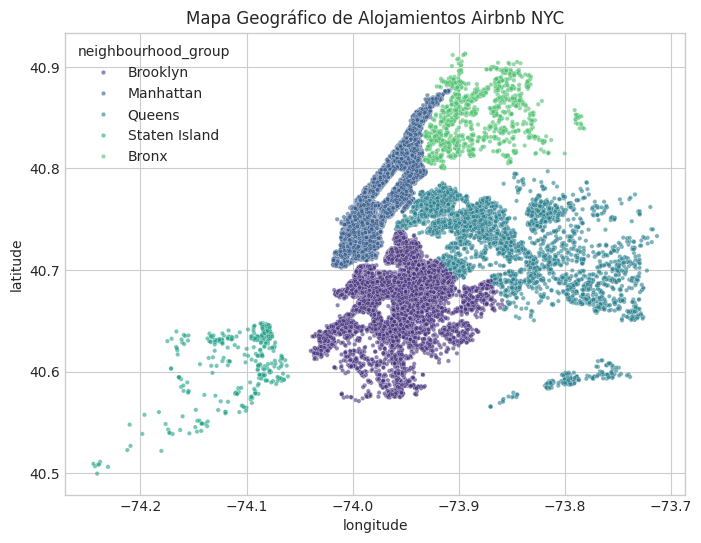

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, x="longitude", y="latitude",
    hue="neighbourhood_group", s=10, alpha=0.6
)
plt.title("Mapa Geográfico de Alojamientos Airbnb NYC")
plt.show()


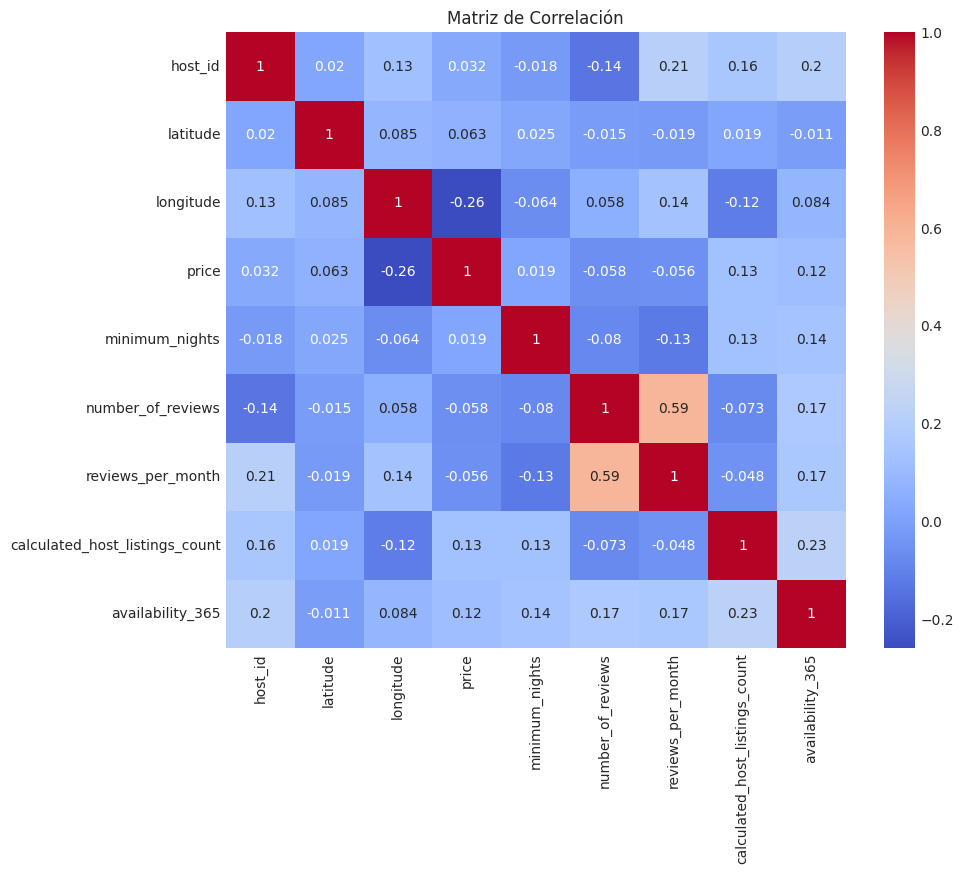

In [17]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


In [18]:
df_processed = pd.get_dummies(df, drop_first=True)


In [19]:
from sklearn.model_selection import train_test_split

X = df_processed.drop("price", axis=1)
y = df_processed["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((38924, 235), (9732, 235))

In [20]:
df_processed.to_csv("../data/processed/AB_NYC_2019_clean.csv", index=False)

print("Archivo guardado en data/processed/")


Archivo guardado en data/processed/


Conclusiones del EDA – Airbnb NYC 2019

1. Manhattan y Brooklyn concentran la mayoría de alojamientos.
2. Las “Entire home/apartment” son las más caras; las “Shared rooms”, las más baratas.
3. La variable precio presenta outliers fuertes, especialmente precios mayores a 1000 USD.
4. Variables como number_of_reviews y availability_365 muestran alta variabilidad.
5. Se eliminaron columnas irrelevantes (id, name, host_name) y se manejaron nulos.